# **APRENDIZAGEM SUPERVISIONADA: CLASSIFICAÇÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para **prever a tendência de uma pessoa desenvolver DIABETES** com base em fatores clínicos e laboratoriais.

---

###  Etapas do Processo

- **Pré-processar os dados**  
  Normalizar variáveis, lidar com valores ausentes e garantir que os dados estejam prontos para o modelo.

- **Separar os dados por classe**  
  Dividir o conjunto em pacientes com e sem diagnóstico de diabetes.

- **Calcular probabilidades com base no Teorema de Bayes**  
  - Probabilidade de cada fator clínico dado a classe (ex: glicose alta dado que tem diabetes).  
  - Probabilidade a priori de cada classe.

- **Classificar novos pacientes**  
  Usar as probabilidades calculadas para prever a classe de novos registros — ou seja, se há tendência de desenvolver diabetes ou não.

---

Esse processo será implementado com o algoritmo **Naive Bayes**, por ser eficiente, rápido e adequado para problemas de classificação como este.



### 1- Fonte dos Dados

Os dados utilizados neste projeto foram extraídos do site **Kaggle**, no seguinte conjunto:

🔗 [Naive Bayes Classification Data – Kaggle](https://www.kaggle.com/datasets/himanshunakrani/naive-bayes-classification-data)

Este dataset contém informações clínicas e laboratoriais que permitem realizar previsões sobre o risco de diabetes com base em diferentes atributos.


##Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


### 2. Exploração e limpeza dos dados

In [ ]:
df = pd.read_csv("/content/Naive-Bayes-Classification-Data.csv")

df.head()


,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [ ]:
df.shape

(995, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   glicose           995 non-null    float64
 1   pressao_arterial  995 non-null    float64
 2   diabetes          995 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 23.4 KB


Colunas para portugues

In [ ]:
print(df.columns)


Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object')


In [ ]:
df.rename(columns={
    'glucose': 'glicose',
    'bloodpressure': 'pressao_arterial',
    'diabetes': 'diabetes'
}, inplace=True)

In [ ]:
df

,glicose,pressao_arterial,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


###  Exploração dos Dados e Pré-processamento

Nesta etapa, realizamos uma análise inicial da base de dados e aplicamos transformações básicas para preparar os dados para o modelo de classificação.


In [ ]:
df['diabetes'].value_counts()


,count
diabetes,
1,125
0,50


In [ ]:
df.isnull().sum()

,0
glicose,0
pressao_arterial,0
diabetes,0


In [ ]:
df.duplicated().sum()
df.drop_duplicates(keep='first',inplace = True)
df.reset_index(drop=True,inplace = True)

###  Impacto na Qualidade dos Dados

A análise inicial mostra que o conjunto de dados está **limpo e pronto para uso**:
- **Ausência de valores nulos**: não é necessário realizar imputações ou excluir registros, o que simplifica o processo de pré-processamento e evita perda de informação.
  
- **Variáveis no formato `int64`**: todas as variáveis são numéricas e discretas, características ideais para o uso do algoritmo **Naive Bayes** — especialmente as versões **Multinomial** e **Bernoulli**, que lidam muito bem com esse tipo de dado.


### Visualização dos Dados

Nesta fase, exploramos graficamente o conjunto de dados para identificar tendências, padrões, outliers e correlações relevantes entre variáveis.

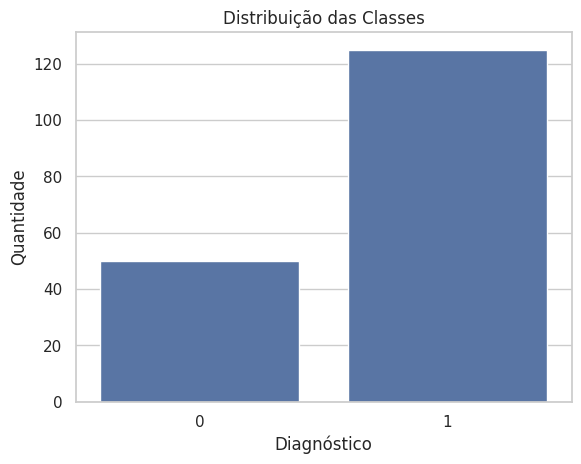

In [ ]:
sns.countplot(x='diabetes', data=df)
plt.title("Distribuição das Classes")
plt.xlabel("Diagnóstico")
plt.ylabel("Quantidade")
plt.show()


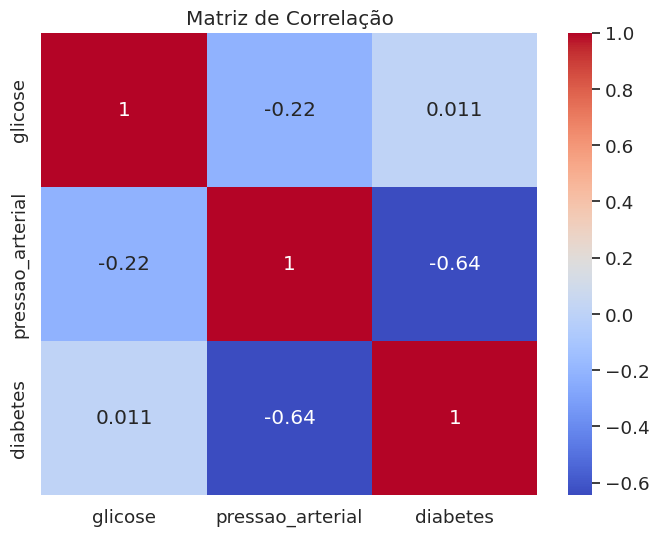

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


###  Correlações entre Variáveis

| **Relação entre Variáveis**         | **Coeficiente** | **Interpretação**                                                                 |
|------------------------------------|-----------------|------------------------------------------------------------------------------------|
| Glicose × Pressão Arterial         | `-0,22`         | Correlação negativa fraca — leve tendência de queda da pressão com aumento da glicose |
| Glicose × Diabetes                 | `0,011`         | Praticamente nenhuma relação direta                                               |
| Pressão Arterial × Diabetes        | `-0,64`         | Correlação negativa moderada — pressão mais baixa pode estar associada à maior incidência de diabetes |

---



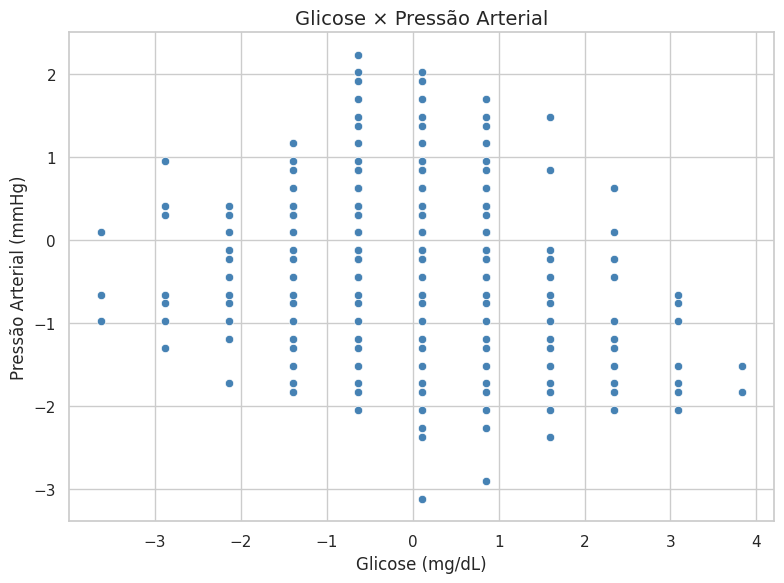

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='glicose',
    y='pressao_arterial',
    color='steelblue'
)


plt.title('Glicose × Pressão Arterial', fontsize=14)
plt.xlabel('Glicose (mg/dL)')
plt.ylabel('Pressão Arterial (mmHg)')

plt.tight_layout()
plt.show()

Distribuição dos pontos: As observações estão amplamente espalhadas pelo gráfico, sem formar uma linha ou padrão claro. Isso sugere que não há uma correlação forte ou consistente entre os níveis de glicose e pressão arterial.

### Aplicando o Modelo Naive Bayes utilizando distribuição Gaussiana.


In [ ]:
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.8857142857142857

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.88      0.92        25

    accuracy                           0.89        35
   macro avg       0.85      0.89      0.87        35
weighted avg       0.90      0.89      0.89        35



# Conclusão
Este projeto foi uma oportunidade para aplicar os conceitos iniciais que estou aprendendo sobre modelos de Machine Learning. Mesmo ainda estando no começo, consegui construir um modelo com bons resultados, alcançando uma acurácia de 87%. Aos poucos, estou entendendo como métricas como precisão, recall e F1-score ajudam na avaliação dos modelos. Pretendo continuar estudando para melhorar ainda mais os resultados.